# ¿Cuál es la mejor tarifa?

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Realizaré un preprocesamiento de datos, buscando datos duplicados y ausentes.
Luego pasaré a comprobar lo que se le pueda añadir a cada tabla, como nuevas columnas y redondear diferentes unidades de medir.
Finalmente pasaré a la prueba de hipótesis, después de comprobación de gastos e ingresos para poder determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [ ]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df =  pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print('Info general del Dataframe de las tarifas:')
plans_df.info()

print('\nEstadísticas descriptivas del Dataframe de las tarifas:')
print(plans_df.describe())

print('\nValores únicos en cada columna del Dataframe de las tarifas:')
for column in plans_df.columns:
    print(f'{column}: {plans_df[column].nunique()} valores únicos.')

Info general del Dataframe de las tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

Estadísticas descriptivas del Dataframe de las tarifas:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std   

In [ ]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

In [ ]:
# TENER EN CUENTA QUE EL PAGO DE INTERNET ENTÁ EN GB Y EL CONSUMO EN MG

## Enriquecer los datos

In [ ]:
# le cambio el nombre de la columna plan_name a plan_id
# ya que veo que solo hay dos identificadores para el plan: surf y ultimate

plans_df.rename(columns={'plan_name':'plan_id'}, inplace=True)
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios

users_df.head()

# churn_date -> fecha de cancelación
# los valores NaN en esta columna, no significan algo malo, significa que los usuarios no han cancelado su plan/servicio

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Corregir los datos

In [ ]:
# comprobamos si hay datos nulos
print(users_df.isna().sum())

# verificamos si hay datos duplicados
print(f'\nHay {users_df.duplicated().sum()} datos duplicados')

# verificamos si hay inconsistencia de datos:
# verificamos que no exista la misma llamada para el mismo usuario
# users_df.duplicated(subset=['call_id', 'user_id']).sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Hay 0 datos duplicados


### Enriquecer los datos

In [ ]:
# cambiaremos el plan a plan_id para facilitar su uso

users_df.rename(columns={'plan':'plan_id'}, inplace=True)
users_df.head()

# para interpretar bien los datos, convertiremos el tipo de dato de reg_date (object) a DateTime.
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df.head()

# crearemos una nueva columna en donde extraeremos el mes con el constructor DatetimeIndex
users_df['reg_month'] = pd.DatetimeIndex(users_df['reg_date']).month
users_df.info()

# para interpretar bien los datos, convertiremos el tipo de dato de churn_date (object) a DateTime.
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df.head()

users_df['churn_month'] = pd.DatetimeIndex(users_df['churn_date']).month
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_id     500 non-null    object        
 7   churn_date  34 non-null     object        
 8   reg_month   500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object      

Sólo 34 usuarios han cancelado su plan

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()
calls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
# Imprime una muestra de datos para las llamadas
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Corregir los datos

In [ ]:
# comprobamos si hay datos nulos
print(calls_df.isna().sum())

# verificamos si hay datos duplicados
print(f'\nHay {calls_df.duplicated().sum()} datos duplicados')

# verificamos si hay inconsistencia de datos:
# verificamos que no exista la misma llamada para el mismo usuario dos veces
# calls_df.duplicated(subset=['call_id', 'user_id']).sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Hay 0 datos duplicados


### Enriquecer los datos

In [ ]:
# cambiaremos el id a call_id para facilitar su uso

calls_df.rename(columns={'id':'call_id'}, inplace=True)
calls_df.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
# para interpretar bien los datos, convertiremos el tipo de dato de...
# call_date (object) a DateTime.

calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
calls_df.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
# normalmente las empresas, analizan mes a mes su información.
# crearemos una nueva columna en donde extraeremos el mes con el constructor DatetimeIndex

calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month
calls_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [ ]:
calls_df.head()

,call_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()
# messages_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes

messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [ ]:
# comprobamos si hay datos nulos
print(messages_df.isna().sum())

# verificamos si hay datos duplicados
print(f'\nHay {messages_df.duplicated().sum()} datos duplicados')

# verificamos si hay inconsistencia de datos:
# verificamos que no exista el mismo id de mensaje para el mismo usuario (repetición)
messages_df.duplicated(subset=['id', 'user_id']).sum()

id              0
user_id         0
message_date    0
dtype: int64

Hay 0 datos duplicados


0

### Enriquecer los datos

In [ ]:
# cambiaremos el id a message_id para facilitar su uso

messages_df.rename(columns={'id':'message_id'}, inplace=True)
messages_df.head()

,message_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
# para interpretar bien los datos, convertiremos el tipo de dato de...
# message_date (object) a DateTime.

messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
messages_df.head()

# confirmando rangos de fechas
min_date_messages = messages_df['message_date'].min()
max_date_messages = messages_df['message_date'].max()

print(f'Fecha mínima de nuestro dataset {min_date_messages}')
print(f'Fecha máxima de nuestro dataset {max_date_messages}')

Fecha mínima de nuestro dataset 2018-01-15 00:00:00
Fecha máxima de nuestro dataset 2018-12-31 00:00:00


In [ ]:
# normalmente las empresas, analizan mes a mes su información.
# crearemos una nueva columna en donde extraeremos el mes con el constructor DatetimeIndex

messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
messages_df.head()

,message_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()
internet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [ ]:
# comprobamos si hay datos nulos
print(internet_df.isna().sum())

# verificamos si hay datos duplicados
print(f'\nHay {internet_df.duplicated().sum()} datos duplicados')

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Hay 0 datos duplicados


### Enriquecer los datos

In [ ]:
# cambiaremos el id a internet_id para facilitar su uso

internet_df.rename(columns={'id':'internet_id'}, inplace=True)
internet_df.head()

,internet_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
# para interpretar bien los datos, convertiremos el tipo de dato de...
# session_date (object) a DateTime.

internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
# normalmente las empresas, analizan mes a mes su información.
# crearemos una nueva columna en donde extraeremos el mes con el constructor DatetimeIndex

internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

In [ ]:
internet_df.info()
print('')
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB



,internet_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [ ]:
# porcentaje de usuarios que usan 0 megas

percentage_users_megas_not_used = round((len(internet_df.query('mb_used == 0'))/len(internet_df))*100)
print(f'El {percentage_users_megas_not_used}% usuarios que no utilizan MB de internet.')

El 13% usuarios que no utilizan MB de internet.


## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7

In [ ]:
# verificando el consumo de usuarios por ciudad

In [ ]:
plan_analytics = users_df[['user_id', 'plan_id', 'city']]

In [ ]:
plan_analytics

,user_id,plan_id,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


## Agregar datos por usuario



In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Para cumplir con estas indicaciones, se realizó de esta manera:

In [ ]:
import math
def redondeo_llamadas(duracion):
    redondeo = math.ceil(duracion)
    return redondeo
calls_df['duracion_redondeada'] = calls_df['duration'].apply(redondeo_llamadas)

In [ ]:
calls_df

,call_id,user_id,call_date,duration,month,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9
137731,1499_200,1499,2018-10-20,10.89,10,11
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,10,1


In [ ]:
# cuánto gasta un usuario al mes en llamadas, el total

analytics_calls = calls_df.pivot_table(index=['user_id', 'month'],
                                       values='duracion_redondeada',
                                       aggfunc=['sum', 'count'])
analytics_calls.head(10)

sum               count
              duracion_redondeada duracion_redondeada
user_id month                                        
1000    12                    124                  16
1001    8                     182                  27
        9                     315                  49
        10                    393                  65
        11                    426                  64
        12                    412                  56
1002    10                     59                  11
        11                    386                  55
        12                    384                  47
1003    12                   1104                 149

In [ ]:
analytics_calls.columns = ['minutos_usados', 'llamadas_realizadas'] # cambiamos los nombres de columnas
analytics_calls.head(10)

minutos_usados  llamadas_realizadas
user_id month                                     
1000    12                124                   16
1001    8                 182                   27
        9                 315                   49
        10                393                   65
        11                426                   64
        12                412                   56
1002    10                 59                   11
        11                386                   55
        12                384                   47
1003    12               1104                  149

In [ ]:
analytics_calls = analytics_calls.reset_index() # el índice se vuelve columna
analytics_calls

,user_id,month,minutos_usados,llamadas_realizadas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [ ]:
# -----------------------------------------------------------------------------------------

In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# calcular la cant de mensajes por usuario y por mes
# cuánto gasta un usuario al mes en mensajes, el total

In [ ]:
analytics_messages = messages_df.pivot_table(index=['user_id', 'month'],
                                       values='message_id',
                                       aggfunc='count')
analytics_messages.head()

message_id
user_id month            
1000    12             11
1001    8              30
        9              44
        10             53
        11             36

In [ ]:
# cambiamos nombres de columnas
analytics_messages.columns = ['amount_of_messages']

# índice a columnas
analytics_messages = analytics_messages.reset_index()

In [ ]:
analytics_messages

,user_id,month,amount_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
# -----------------------------------------------------------------------------------------

In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# calcular la cant de internet por ususario y por mes
# cuánto gasta un usuario al mes en internet, el total

In [ ]:
analytics_internet = internet_df.pivot_table(index=['user_id', 'month'],
                                       values='mb_used',
                                       aggfunc='sum')

In [ ]:
analytics_internet.columns = ['total_mg_used']
analytics_internet = analytics_internet.reset_index()

In [ ]:
analytics_internet

,user_id,month,total_mg_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [ ]:
# calcular la cantidad extra o lo que no llegaron a gastar los clientes en internet
# esta función nos ayuda a convertir megabytes a gigabytes y nos redondea hacia arriba

In [ ]:
def datos_redondeo(mb):
    redondeo = math.ceil(mb/1024)
    return redondeo

In [ ]:
analytics_internet['total_gb_used_rounded'] = analytics_internet['total_mg_used'].apply(datos_redondeo)

In [ ]:
analytics_internet

,user_id,month,total_mg_used,total_gb_used_rounded
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

Puedo concluir que los usuarios se exceden más en llamadas que en mensajes. Se cobrarán más llamadas que mensajes

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month:

In [ ]:
# Unimos los analytics, para tener una tabla amplia donde se pueda ver todos los analytics así se facilita a las personas que no saben mucho de los datos, entender.
# unimos analytics_calls y analytics_messages

calls_and_messages = analytics_calls.merge(analytics_messages, on=['user_id', 'month'], how='outer')
calls_and_messages

,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages
0,1000,12,124.0,16.0,11.0
1,1001,8,182.0,27.0,30.0
2,1001,9,315.0,49.0,44.0
3,1001,10,393.0,65.0,53.0
4,1001,11,426.0,64.0,36.0
...,...,...,...,...,...
2286,1349,10,NaN,NaN,76.0
2287,1349,11,NaN,NaN,72.0
2288,1349,12,NaN,NaN,61.0
2289,1361,5,NaN,NaN,2.0


In [ ]:
# unimos calls_and_messages con analytics_internet
consumption_table = calls_and_messages.merge(analytics_internet,
                                             on=['user_id', 'month'],
                                             how='outer')

In [ ]:
# Añade la información de la tarifa:

In [ ]:
# Tabla amplia de consumo de la telefonía - fact table

plan_consumption_table =  consumption_table.merge(plan_analytics, on=['user_id'])
plan_consumption_table

,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages,total_mg_used,total_gb_used_rounded,plan_id,city
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"


In [ ]:
# Calcula el ingreso mensual para cada usuario

# al final de los costos se encuentra la función final para responder a la petición. Punto: 1.12.4

### Costos llamadas

In [ ]:
# cálculo llamadas por cobrar

In [ ]:
def llamadas_por_cobrar(fila):
    plan = fila['plan_id']
    minutos_usados = fila['minutos_usados']

    minutos_cobrables = 0

    if plan == 'surf':
        if minutos_usados > surf_monthly_minutes:
            minutos_cobrables = minutos_usados - surf_monthly_minutes
        # si es menor no lo cobro nada

    elif plan == 'ultimate':
        if minutos_usados > ultimate_monthly_minutes:
            minutos_cobrables = minutos_usados - ultimate_monthly_minutes
        # si es menor no lo cobro nada

    return minutos_cobrables

In [ ]:
plan_consumption_table['minutos_cobrables'] = plan_consumption_table.apply(llamadas_por_cobrar, axis=1)

In [ ]:
plan_consumption_table

,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages,total_mg_used,total_gb_used_rounded,plan_id,city,minutos_cobrables
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.0
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0


In [ ]:
# verificando que hayan valors diferentes a 0
# cuantos son los usuarios que tienen que pagar demás en relación a todos los demás - cobrables
# el portentaje de minutos cobrables frente a todos los minutos que se facturaron
len(plan_consumption_table.query('minutos_cobrables > 0'))/len(plan_consumption_table)

0.24683820322721325

Al 24% de los minutos totales son minutos extra que se cobrarán

### Costos mensajes

In [ ]:
# cálculo mensajes por cobrar

In [ ]:
def mensajes_por_cobrar(fila):
    plan = fila['plan_id']
    mensajes_usados = fila['amount_of_messages']

    mensajes_cobrables = 0

    if plan == 'surf':
        if mensajes_usados > surf_monthly_messages:
            mensajes_cobrables = mensajes_usados - surf_monthly_messages
        # si es menor no lo cobro nada

    elif plan == 'ultimate':
        if mensajes_usados > ultimate_monthly_messages:
            mensajes_cobrables = mensajes_usados - ultimate_monthly_messages
        # si es menor no lo cobro nada

    return mensajes_cobrables


In [ ]:
plan_consumption_table

,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages,total_mg_used,total_gb_used_rounded,plan_id,city,minutos_cobrables
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.0
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0


In [ ]:
plan_consumption_table['mensajes_cobrables'] = plan_consumption_table.apply(mensajes_por_cobrar, axis=1)

In [ ]:
# cuantos mensajes voy a cobrar en total

len(plan_consumption_table.query('mensajes_cobrables > 0'))/len(plan_consumption_table)

0.14827736589620585

El 14% de los mensaje totales son mensajes extra que se cobrarán al usuario

### Costos internet

In [ ]:
# cálculo internet por cobrar

In [ ]:
def datos_por_cobrar(fila): # chargeable_data
    plan = fila['plan_id']
    datos_usados = fila['total_gb_used_rounded']

    datos_cobrables = 0

    if plan == 'surf':
        if datos_usados > surf_monthly_data :
            datos_cobrables = datos_usados - surf_monthly_data
        # si es menor no lo cobro nada

    elif plan == 'ultimate':
        if datos_usados > ultimate_monthly_data:
            datos_cobrables = datos_usados - ultimate_monthly_data
        # si es menor no lo cobro nada

    return datos_cobrables

In [ ]:
plan_consumption_table['datos_cobrables'] = plan_consumption_table.apply(datos_por_cobrar, axis=1)

In [ ]:
plan_consumption_table

,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages,total_mg_used,total_gb_used_rounded,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.0,0.0,6.0
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,26.0,0.0
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,22.0,2.0
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,11.0,0.0


In [ ]:
len(plan_consumption_table.query('datos_cobrables > 0'))/len(plan_consumption_table)

0.41517662450937637

El 41% de usuarios consumen más datos de los que incluye el plan. Más rentabilidad ofrece.

### Ingreso final

In [ ]:
# rentabilidad mensual function

In [ ]:
def rentabilidad_mensual(fila): #ingreso_mensual
    plan = fila['plan_id']

    llamadas_cobrables = fila['minutos_cobrables']
    mensajes_cobrables = fila['mensajes_cobrables']
    datos_cobrables = fila['datos_cobrables']

    rentabilidad = 0

    if plan == 'surf':
        rentabilidad = surf_monthly_charge + (llamadas_cobrables * surf_call_charge) + (mensajes_cobrables * surf_message_charge) + (datos_cobrables * surf_data_charge)

    elif plan == 'ultimate':
                rentabilidad = ultimate_monthly_charge + (llamadas_cobrables * ultimate_call_charge) + (mensajes_cobrables * ultimate_message_charge) + (datos_cobrables * ultimate_data_charge)

    return rentabilidad

In [ ]:
plan_consumption_table['rentabilidad mensual'] = plan_consumption_table.apply(rentabilidad_mensual, axis=1)

In [ ]:
plan_consumption_table


,user_id,month,minutos_usados,llamadas_realizadas,amount_of_messages,total_mg_used,total_gb_used_rounded,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables,rentabilidad mensual
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.0,0.0,6.0,112.00
2289,1349,10,NaN,NaN,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,26.0,0.0,20.78
2290,1349,11,NaN,NaN,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,22.0,2.0,40.66
2291,1349,12,NaN,NaN,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,11.0,0.0,20.33


## Estudiar el comportamiento de usuario

### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

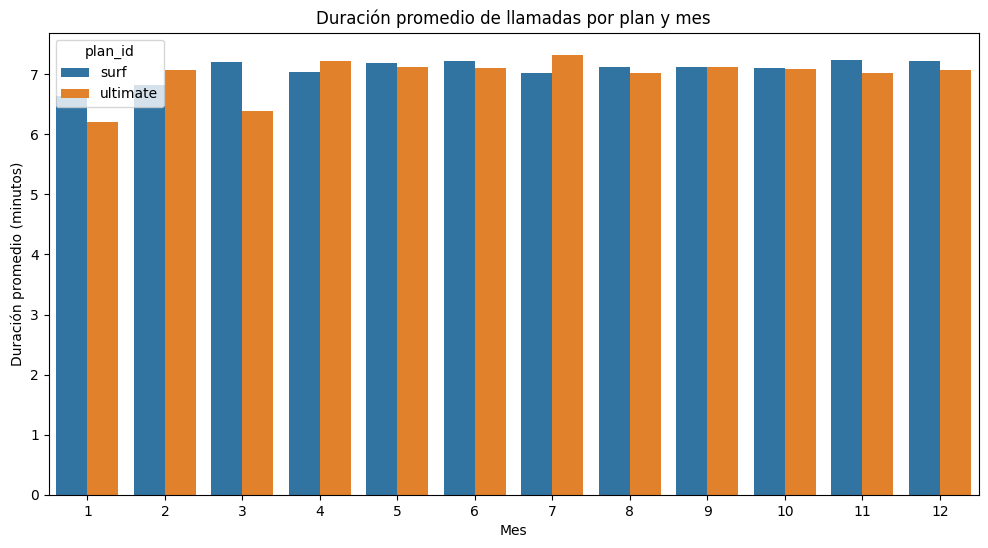

In [ ]:
# añadimos la información del plan a analytics_calls
analytics_calls_w_plan = analytics_calls.merge(users_df[['user_id', 'plan_id']], on='user_id')

# duración promedio de llamadas
analytics_calls_w_plan['duracion_promedio'] = analytics_calls_w_plan['minutos_usados'] / analytics_calls_w_plan['llamadas_realizadas']

# segrupamos por plan y mes, y calculamos el promedio
avg_duration_by_plan_month = analytics_calls_w_plan.groupby(['plan_id', 'month'])['duracion_promedio'].mean().reset_index()

# graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='duracion_promedio', hue='plan_id', data=avg_duration_by_plan_month)
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.show()

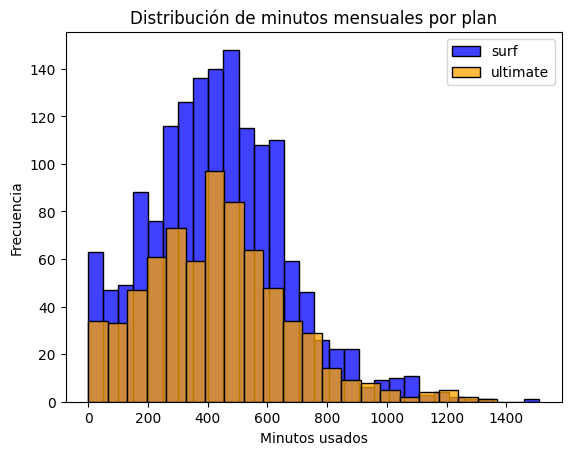

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

sns.histplot(data=analytics_calls_w_plan[analytics_calls_w_plan['plan_id'] == 'surf'],
             x='minutos_usados',
             label='surf',
             kde=False,
             color='blue'
            )

sns.histplot(data=analytics_calls_w_plan[analytics_calls_w_plan['plan_id'] == 'ultimate'],
             x='minutos_usados',
             label='ultimate',
             kde=False,
             color='orange'
            )

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

calls_main_stats = plan_consumption_table.groupby('plan_id')['minutos_usados'].agg(['mean','var']).reset_index()
calls_main_stats


,plan_id,mean,var
0,surf,436.519741,52571.063243
1,ultimate,434.676017,56573.632247


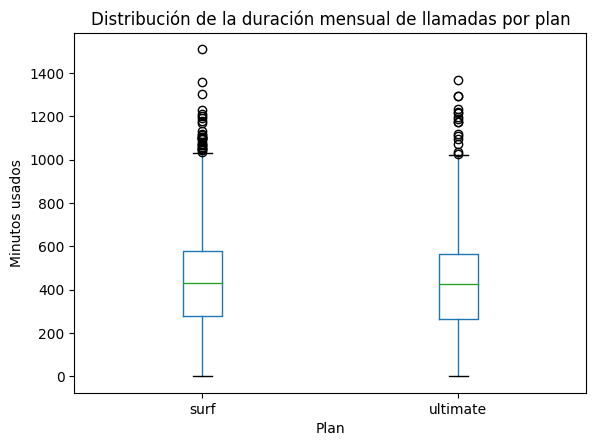

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plan_consumption_table.boxplot(column='minutos_usados',
                               by='plan_id',
                               grid=False
                              )

plt.title('Distribución de la duración mensual de llamadas por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.show()

El comportamiento de los clientes varía en función del plan ya que se ve que hay más personas que compran el plan **surf** que el plan **ultimate**.

### Mensajes

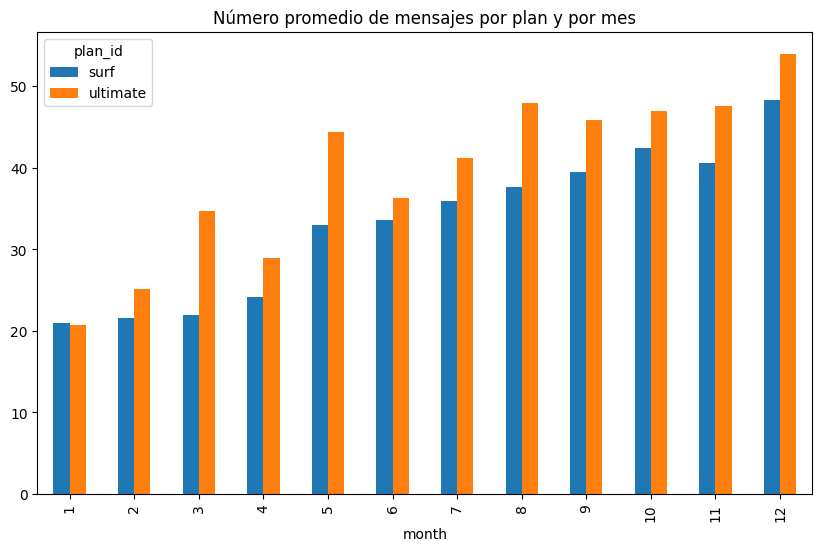

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages = plan_consumption_table.groupby(['plan_id', 'month'])['amount_of_messages'].mean().reset_index()

pivot_avg_messages = avg_messages.pivot(index='month',
                                         columns='plan_id',
                                         values='amount_of_messages'
                                        )
pivot_avg_messages.plot(kind='bar',
                        figsize=(10, 6),
                        title='Número promedio de mensajes por plan y por mes'
                       )
plt.show()

### Internet

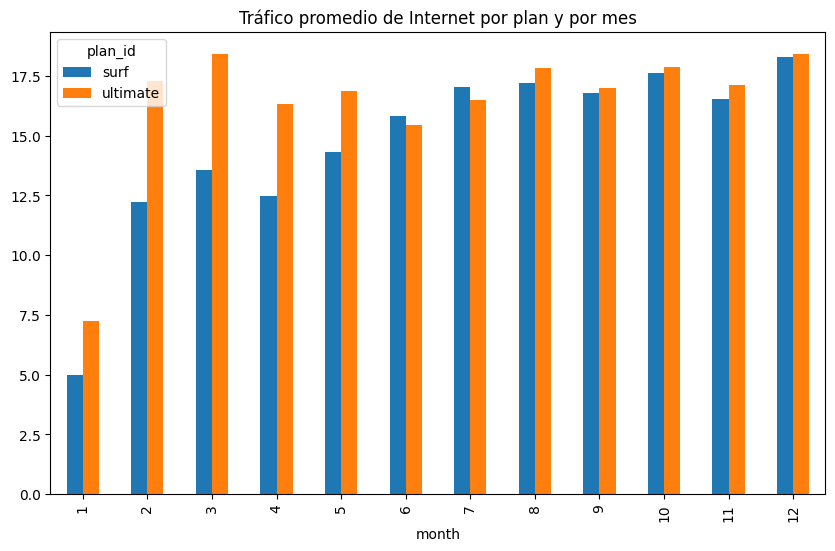

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

avg_internet = plan_consumption_table.groupby(['plan_id', 'month'])['total_gb_used_rounded'].mean().reset_index()

avg_internet_pivot = avg_internet.pivot(index='month',
                                        columns='plan_id',
                                        values='total_gb_used_rounded'
                                       )
avg_internet_pivot.plot(kind='bar',
                        figsize=(10, 6),
                        title='Tráfico promedio de Internet por plan y por mes'
                       )
plt.show()


### Otra forma

De esta forma, se muestran todos las métricas en un sólo código

Analizamos con un gráfico para analizar los planes, la cant de minutos, texto y volumen de datos usados

Da como resultado la distribución (histograma) para c/plan con sus métricas (minutos, mensajes y datos).
Se compara entre planes, los minutos que se usaron, los números de mensajes, y el total de datos usados entre todos los clientes

In [ ]:
variables = ['minutos_usados', 'amount_of_messages', 'total_gb_used_rounded']

In [ ]:
planes = ['surf', 'ultimate']

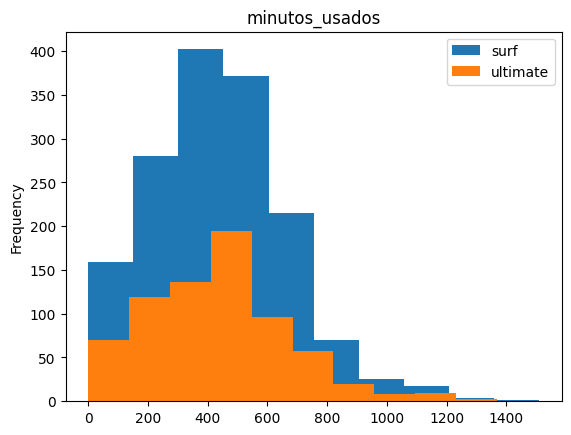

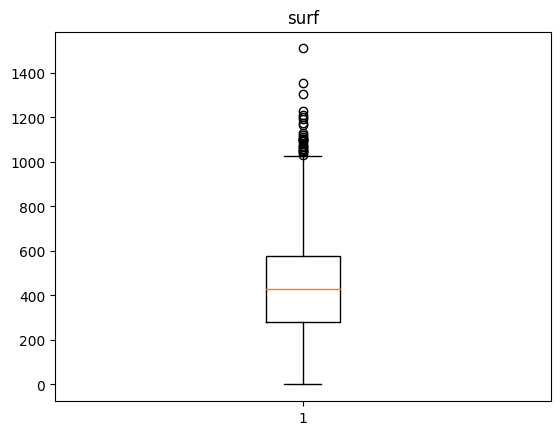

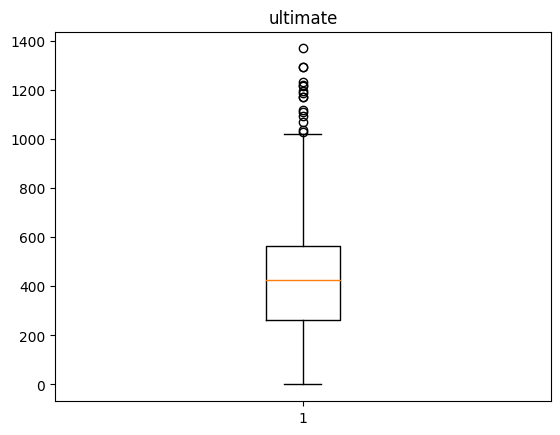

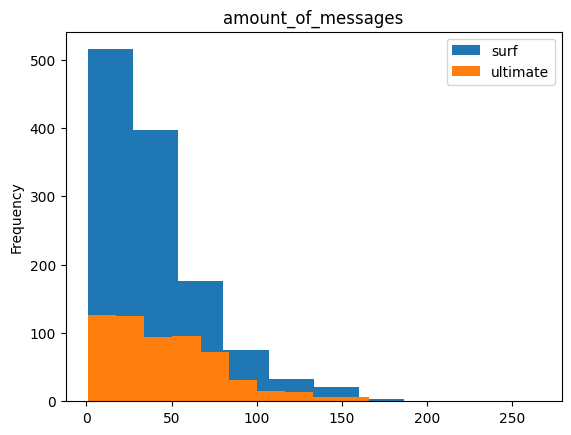

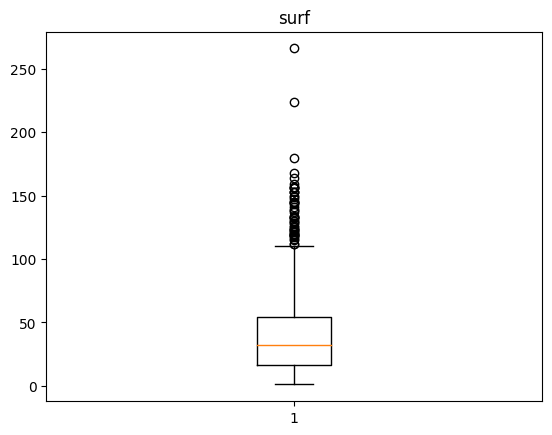

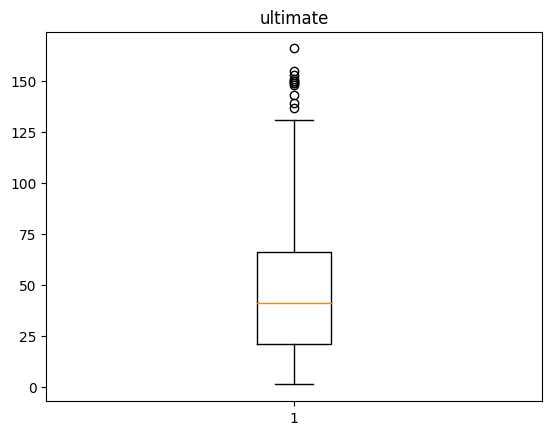

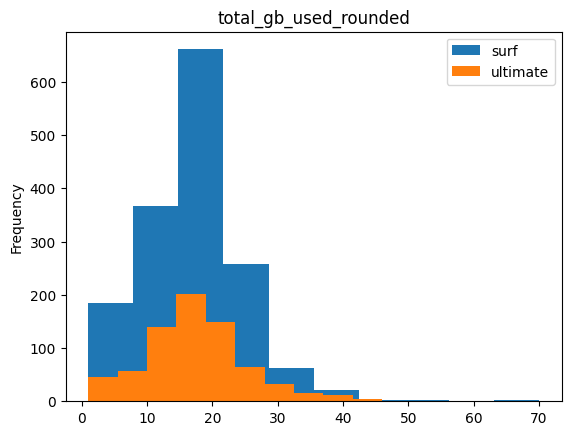

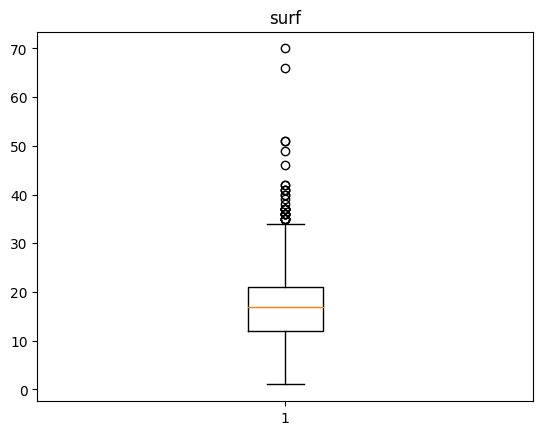

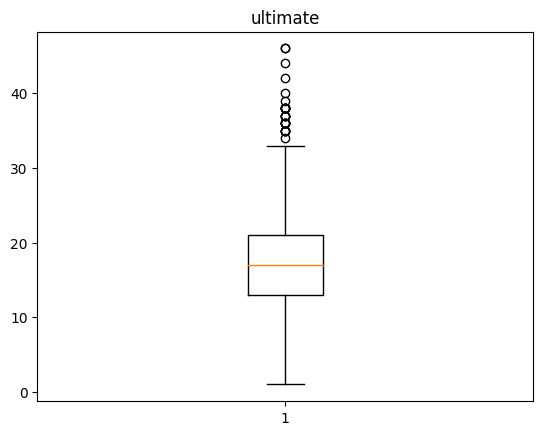

In [ ]:
for metrica in variables:
    for plan in planes:
        plan_consumption_table[plan_consumption_table['plan_id'] == plan][metrica].plot(kind='hist')

    plt.title(metrica)
    plt.legend(planes)
    plt.show()

    for plan in planes:
        plt.boxplot(plan_consumption_table[plan_consumption_table['plan_id'] == plan][metrica].dropna())
        plt.title(plan)
        plt.show()
        # los valores nulos no se pueden graficar en este diagrama, por lo tanto se eliminan



## Ingreso

In [ ]:
# estadísticas descriptivas para rentabilidad mensual
ingresos_stats = plan_consumption_table['rentabilidad mensual'].describe()
# Separar por planes para análisis individual
ingresos_surf = plan_consumption_table[plan_consumption_table['plan_id'] == 'surf']['rentabilidad mensual']
ingresos_ultimate = plan_consumption_table[plan_consumption_table['plan_id'] == 'ultimate']['rentabilidad mensual']

# Estadísticas descriptivas por plan
ingresos_surf_stats = ingresos_surf.describe()
ingresos_ultimate_stats = ingresos_ultimate.describe()

print("\nEstadísticas descriptivas para el plan Surf:")
print(ingresos_surf_stats)
print("\nEstadísticas descriptivas para el plan Ultimate:")
print(ingresos_ultimate_stats)



Estadísticas descriptivas para el plan Surf:
count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: rentabilidad mensual, dtype: float64

Estadísticas descriptivas para el plan Ultimate:
count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: rentabilidad mensual, dtype: float64


Los datos muestran que el plan Ultimate tiende a generar ingresos mensuales más consistentes y elevados en comparación con el plan Surf. La media de ingresos para el plan Ultimate es de aproximadamente 72.31 unidades monetarias, con una desviación estándar de 11.39, indicando una variabilidad relativamente baja en los ingresos generados. En contraste, el plan Surf tiene una media de ingresos menor, alrededor de 60.71 unidades monetarias, pero presenta una desviación estándar considerablemente mayor de 55.39, lo que refleja una mayor variabilidad en los ingresos mensuales. Además, mientras que el ingreso máximo en el plan Surf puede alcanzar hasta 590.37 unidades monetarias, en el plan Ultimate el ingreso máximo es de 182 unidades monetarias. Esto sugiere que, aunque el plan Surf puede generar ingresos significativamente más altos en algunos casos, el plan Ultimate ofrece una fuente de ingresos más estable y predecible.

## Prueba las hipótesis estadísticas

In [ ]:
variables = ['minutos_usados', 'amount_of_messages', 'total_gb_used_rounded']

In [ ]:
planes = ['surf', 'ultimate']

In [ ]:
for plan in planes:
    rentabilidad_mensual_suma = plan_consumption_table[plan_consumption_table['plan_id'] == plan]['rentabilidad mensual'].sum()
    rentabilidad_mensual_promedio = plan_consumption_table[plan_consumption_table['plan_id'] == plan]['rentabilidad mensual'].mean()

    print(f'La rentabilidad del plan {plan} es de {rentabilidad_mensual_suma}')
    print(f'La rentabilidad del plan {plan} es de {rentabilidad_mensual_promedio}')
    print('')

La rentabilidad del plan surf es de 95491.18
La rentabilidad del plan surf es de 60.706408137317226

La rentabilidad del plan ultimate es de 52066.0
La rentabilidad del plan ultimate es de 72.31388888888888



Tal pareciera que las ganancias mensuales que genera el plan ultimate son mayores a las ganancias mensuales que generan el plan surf.
Así sea que la suma total de dólares que da surf es mayor que la suma total que da ultimate.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# cuál es el plan más rentable

In [ ]:
alpha = 0.05 # valor sensible

In [ ]:
# sample_1: ganancia del plan surf

sample_1 = plan_consumption_table.query('plan_id == "surf"')['rentabilidad mensual']

print(sample_1)

sample_1_count = len(plan_consumption_table.query('plan_id == "surf"')['rentabilidad mensual'])

print(f'\n-Cantidad de datos tomados para nuestra primera prueba: {sample_1_count}-')

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2285    290.36
2286    180.18
2289     20.78
2290     40.66
2291     20.33
Name: rentabilidad mensual, Length: 1573, dtype: float64

-Cantidad de datos tomados para nuestra primera prueba: 1573-


In [ ]:
# sample_2: ganancia del plan ultimate

sample_2 = plan_consumption_table.query('plan_id == "ultimate"')['rentabilidad mensual']

print(sample_2)

sample_2_count = len(plan_consumption_table.query('plan_id == "ultimate"')['rentabilidad mensual'])

print(f'\n-Cantidad de datos tomados para nuestra segunda prueba: {sample_2_count}-')

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2231     70.0
2247     70.0
2287     70.0
2288    112.0
2292     70.0
Name: rentabilidad mensual, Length: 720, dtype: float64

-Cantidad de datos tomados para nuestra segunda prueba: 720-


Vemos que para el plan **surf**, se toman 1573 datos. En canbio, para el plan **ultimate** tenemos 720 datos.


_Hipótesis nula (H0)_: Los promedios mensuales del plan _surf_ son **iguales** al plan _ultimate_


_Hipótesis alternativa (H1)_: Los promedios mensules del plan _surf_ son **diferentes** al plan _ultimate_


In [ ]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

p_value = results.pvalue
print(f'p-value: {p_value}')

p-value: 3.1703905481135734e-15


In [ ]:
if p_value < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No se puede rechazar la hipótesis nula.')

Rechazamos la hipótesis nula.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

_Hipótesis nula (H0)_: El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

_Hipótesis alternativa (H1)_: El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

In [ ]:
# filtramos los usuarios del área NY-NJ
ny_nj_users = plan_consumption_table.query('city == "NY-NJ"')['rentabilidad mensual']
# cant muestras
ny_nj_count = len(ny_nj_users)

In [ ]:
# filtramos los usuarios de otras regiones
other_users = plan_consumption_table.query('city != "NY-NJ"')['rentabilidad mensual']
# cant muestras
other_users_count = len(other_users)

In [ ]:
# Prueba las hipótesis

alpha = 0.05
results = st.ttest_ind(ny_nj_users, other_users, equal_var=False)

p_value = results.pvalue


print(f'Cantidad de usuarios en NY-NJ: {ny_nj_count}')
print(f'Cantidad de usuarios en otras regiones: {other_users_count}')
print(f'p-value: {p_value}')


Cantidad de usuarios en NY-NJ: 0
Cantidad de usuarios en otras regiones: 2293
p-value: nan


In [ ]:
if p_value < alpha:
    print('Rechazamos la hipótesis nula. Hay una diferencia significativa en el ingreso promedio entre los usuarios de NY-NJ y los usuarios de otras regiones.')
else:
    print('No se puede rechazar la hipótesis nula. No hay una diferencia significativa en el ingreso promedio entre los usuarios de NY-NJ y los usuarios de otras regiones.')


No se puede rechazar la hipótesis nula. No hay una diferencia significativa en el ingreso promedio entre los usuarios de NY-NJ y los usuarios de otras regiones.


In [ ]:
# valores únicos en la columna 'city'
print(plan_consumption_table['city'].unique())

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

## Conclusión general

**Rentabilidad de las Tarifas**: Se observó que el plan Ultimate genera ingresos mensuales más consistentes y elevados en comparación con el plan Surf. La media de ingresos para el plan Ultimate es aproximadamente de 72.31 unidades monetarias, mientras que para el plan Surf es de alrededor de 60.71 unidades monetarias. Además, el plan Ultimate muestra una variabilidad menor en los ingresos generados, lo que sugiere una fuente de ingresos más estable y predecible.

**Pruebas Estadísticas**: Al realizar pruebas estadísticas para comparar la rentabilidad mensual entre ambos planes, se rechazó la hipótesis nula, indicando que hay una diferencia significativa en los promedios mensuales de rentabilidad entre los planes Surf y Ultimate. Esto refuerza la idea de que el plan Ultimate es más rentable en términos de ingresos promedio por usuario.

**Análisis Regional**: En cuanto a la hipótesis sobre si el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones, no se pudo rechazar la hipótesis nula debido a la falta de datos suficientes específicamente para la región de NY-NJ. Sin embargo, este análisis destaca la importancia de tener en cuenta factores geográficos en futuros estudios para entender mejor las diferencias regionales en la rentabilidad.